<font size=5>**Prediction of Remaining Useful Lifetime for Turbofan Engine**</font>

---

**Project overview :**

The main aim of this project is to implement a ML model that can be used to perform predictive maintenance on turbofan engine. The predictive maintenance approach used here is a data-driven approach, meaning that data collected from the operational jet engine is used to perform predictive maintenance modeling. To be specific, the project aim is to build a predictive model to estimate the Remaining Useful Life (RUL) of a jet engine based on run-to-failure data.

**Dataset source :** 
> - [PHM08 Challenge Data Set](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/)
> - [Turbofan Engine Degradation Simulation Data Set](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/)

In [1]:
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### Load datasets

In [2]:
path_to_raw = '../data/raw/CMAPSSData/'
# path_to_processed = '../data/processed/train/'

# get all train dataset filenames
raw_files = sorted(glob.glob(path_to_raw+'train*'))

In [3]:
raw_files

['../data/raw/CMAPSSData/train_FD001.txt',
 '../data/raw/CMAPSSData/train_FD002.txt',
 '../data/raw/CMAPSSData/train_FD003.txt',
 '../data/raw/CMAPSSData/train_FD004.txt']

In [4]:
# upload data
raw_data = pd.read_csv(raw_files[0], sep=' ', header=None, )

# drop duplicate entry
raw_data.drop_duplicates(inplace=True)

raw_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [5]:
# drop empty columns (last 2 colums)
raw_data.dropna(axis=1, inplace=True)

# header
header = [  'engine_id', 'time_cycle','op_set_1', 'op_set_2', 'op_set_3', 
            'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 
            'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 
            'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 
            'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 
            'sensor_21'
         ]

# rename header
raw_data.set_axis(labels=header, axis=1, inplace=True)

In [6]:
raw_data

,engine_id,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


### Missing values

In [7]:
# find any missing values
raw_data.isna().sum()

engine_id     0
time_cycle    0
op_set_1      0
op_set_2      0
op_set_3      0
sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
sensor_5      0
sensor_6      0
sensor_7      0
sensor_8      0
sensor_9      0
sensor_10     0
sensor_11     0
sensor_12     0
sensor_13     0
sensor_14     0
sensor_15     0
sensor_16     0
sensor_17     0
sensor_18     0
sensor_19     0
sensor_20     0
sensor_21     0
dtype: int64

### Compute target (Remaining Useful Lifetime, RUL)

In [8]:
# create new max_cycle df, each unit have their own max_cycle
max_cycle = raw_data.groupby('engine_id', sort=False)['time_cycle'].max().to_frame('max_cycle').reset_index()

# merge raw_data with max_cycle
df = pd.merge(raw_data, max_cycle, how='inner', on='engine_id')

# compute RUL
df['RUL'] = df['max_cycle'] - df['time_cycle']

# compute Health Index (normalize RUL)
df['HI'] = df['time_cycle']/df['max_cycle']

In [9]:
df.shape

(20631, 29)

In [10]:
df

,engine_id,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_cycle,RUL,HI
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,0.005208
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,0.010417
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,0.015625
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,0.020833
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4,0.980000
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3,0.985000
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2,0.990000
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1,0.995000


### Numerical variables

In [11]:
# make a list of numerical variables
# any column type equal to object is considered as non numerical

num_vars = [var for var in df.columns if df[var].dtypes != 'O']
print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
df[num_vars].head()

Number of numerical variables:  29


,engine_id,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_cycle,RUL,HI
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,0.005208
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,0.010417
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,0.015625
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,0.020833
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,0.026042


- From the above view of the dataset, we notice the variable engine_id use to identified which engine the measures were done. We will not use this variable to make our predictions.

- Variable time_cycle is used to compute RUL


In [12]:
print(f'Number of Engine Id labels : {df.engine_id.nunique()}')

Number of Engine Id labels : 100


#### Continous variable

In [13]:
# make list of continuous variables
num_var_to_drop = ['engine_id']
cont_vars = [var for var in num_vars if var not in num_var_to_drop]

print(f'Number of continuous variables: {len(cont_vars)}')

Number of continuous variables: 28


In [14]:
df[cont_vars].head()

,time_cycle,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,max_cycle,RUL,HI
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,0.005208
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,0.010417
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,0.015625
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,0.020833
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,0.026042


In [15]:
df[cont_vars].columns

Index(['time_cycle', 'op_set_1', 'op_set_2', 'op_set_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'max_cycle', 'RUL',
       'HI'],
      dtype='object')

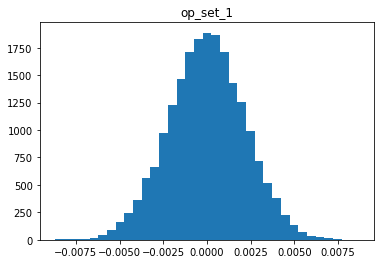

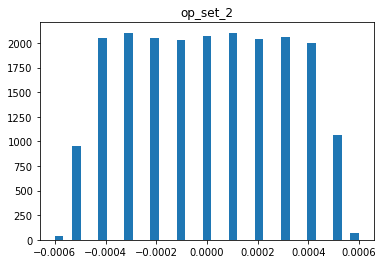

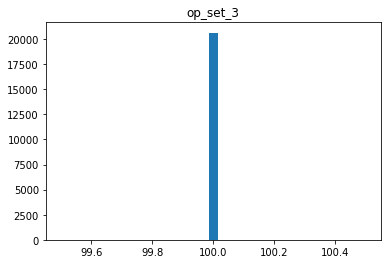

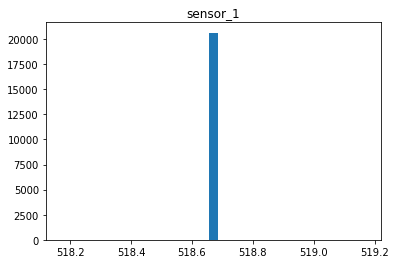

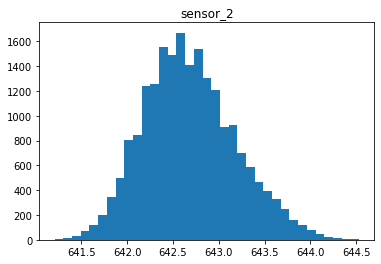

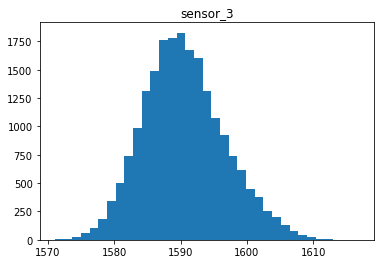

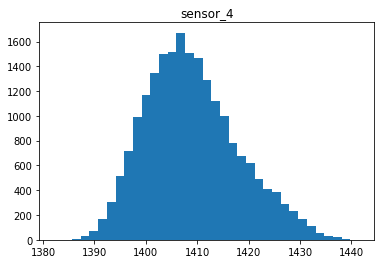

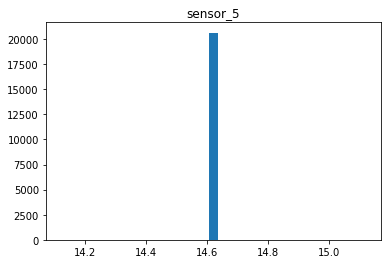

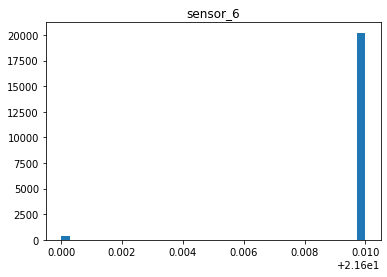

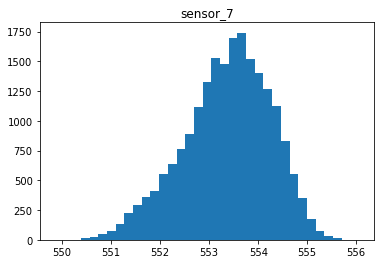

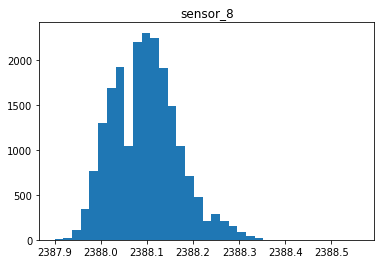

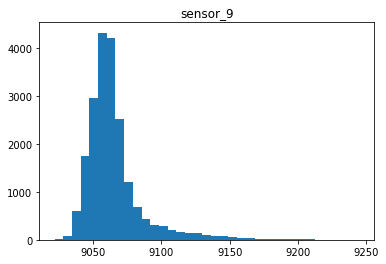

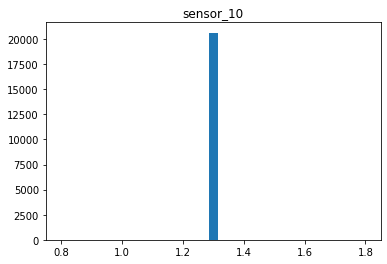

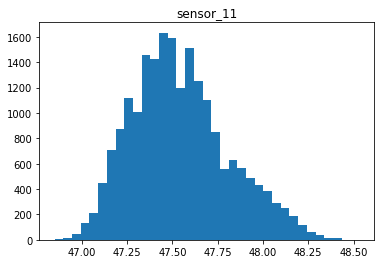

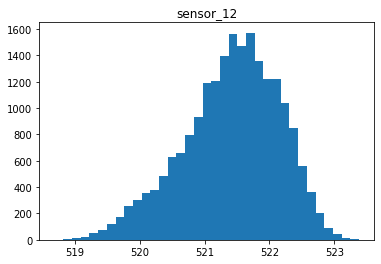

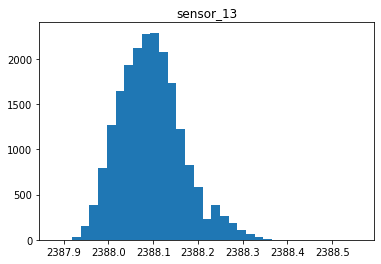

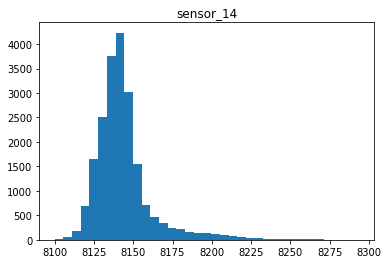

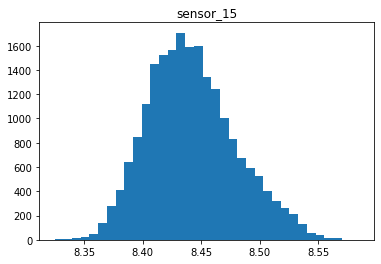

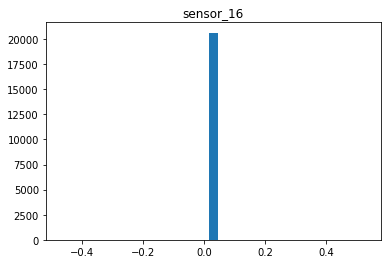

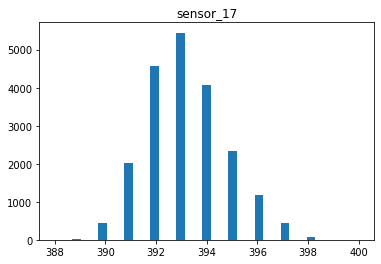

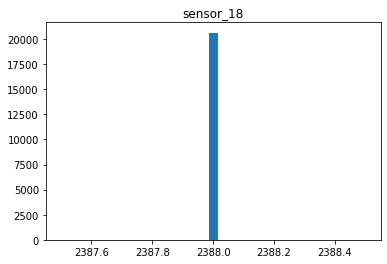

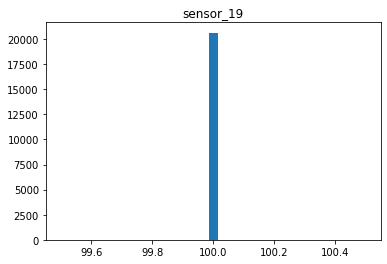

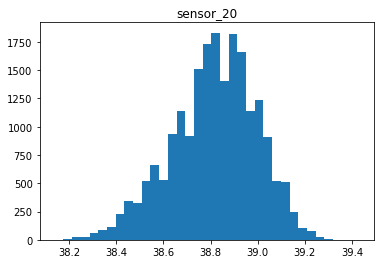

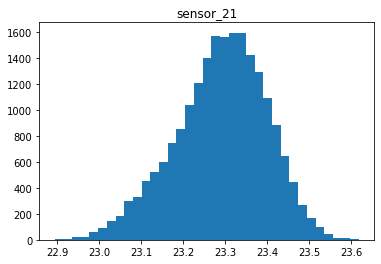

In [33]:
def plot_hist():
    for var in df[cont_vars].columns[1:-3]:
        plt.hist(df[var],bins=35)
        plt.title(var)
        plt.show()    

plot_hist()

This give us information about distribution of all sensors measurement :
> - Constant variables : ['op_set_3', 'sensor_18', 'sensor_19']
> - Quasi-constant variables : ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16']
> - Discreet variables : ['op_set_2', 'sensor_17']


#### Discreet variable

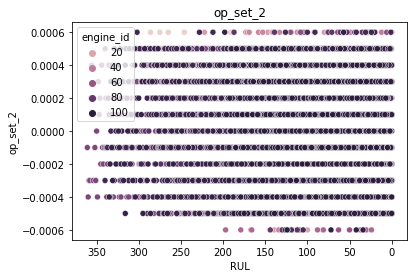

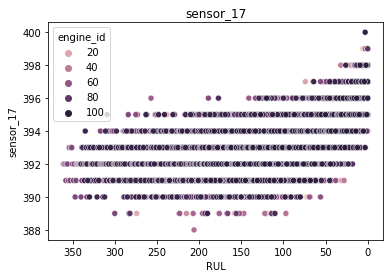

In [75]:
def plot_scatter():
    for var in discreet_vars:
        sns.scatterplot(df['RUL'], df[var], hue=df['engine_id'])
        plt.title(var)
        plt.xlabel('RUL')
        plt.gca().invert_xaxis()
        plt.show()  
        

plot_scatter()

### Max, Mean, Med & Min cycles

In [64]:
# maximum cycle engine
engine_max = df['engine_id'][df.max_cycle == df.max_cycle.max()].unique()
print(f'Engine with maximum cycle         : unit {engine_max}, {df.max_cycle.max()} cycles')

# mean cycle engine
engine_mean = df['engine_id'][df.max_cycle == int(df.max_cycle.mean())].unique()
print(f'Engine which cycle near to mean   : unit {engine_mean}, {int(df.max_cycle.mean())} cycles')

# median cycle engine
engine_med = df['engine_id'][df.max_cycle == int(df.max_cycle.median())].unique()
print(f'Engine which cycle near to median : unit {engine_med}, {int(df.max_cycle.median())} cycles')

# min cycle engine
engine_min = df['engine_id'][df.max_cycle == int(df.max_cycle.min())].unique()
print(f'Engine with minimum cycle         : unit {engine_min}, {int(df.max_cycle.min())} cycles')

# look for engines above
selected_id = [69, 15, 41, 39]
df_sel = df.loc[df['engine_id'].isin(selected_id)]

Engine with maximum cycle         : unit [69], 362 cycles
Engine which cycle near to mean   : unit [41], 216 cycles
Engine which cycle near to median : unit [15 43], 207 cycles
Engine with minimum cycle         : unit [39], 128 cycles


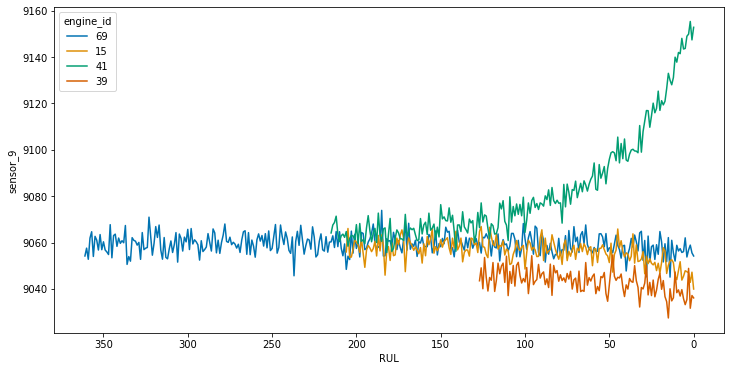

In [76]:
# plotting 
plt.figure(figsize=(12,6))
# sns.lineplot(data=df_sel, x='time_cycle', y='RUL', hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind')
sns.lineplot(data=df_sel, y='sensor_9', x='RUL', hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind')
plt.gca().invert_xaxis()
# sns.scatterplot(data=df_sel, x='sensor_9', y='sensor_14', hue='engine_id', hue_order=[69, 15, 41, 39], palette='colorblind', alpha=0.35)
# sns.regplot(data=df_sel, x='sensor_9', y='sensor_14', color='red', scatter=False)
plt.show()

### Pairwise correlation

<AxesSubplot:title={'center':'../data/raw/CMAPSSData/train_FD001.txt'}>

<Figure size 432x288 with 0 Axes>

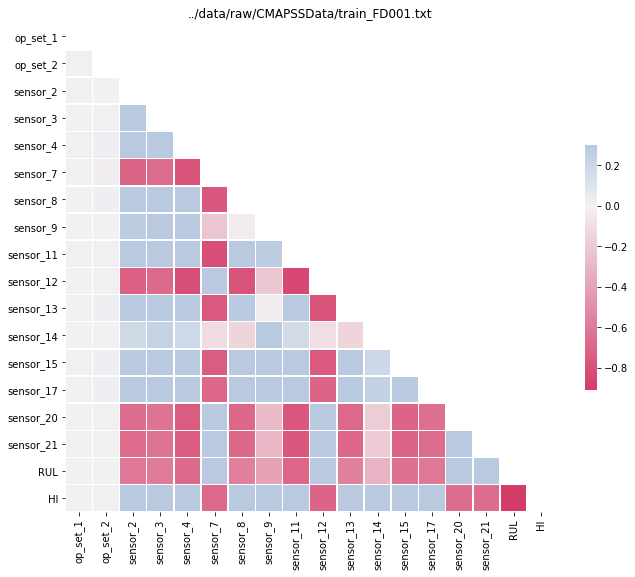

In [78]:
# id, constant, quasi-constant features to be removed
to_drop = ['engine_id', 'time_cycle', 'max_cycle']
constant_features = ['op_set_3', 'sensor_18', 'sensor_19']
quasi_cons_features = ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16']

# corr = df.drop(to_drop, axis=1).corr()
corr = df.drop(to_drop+constant_features+quasi_cons_features, axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure()
f, ax = plt.subplots(figsize=(11, 9))

# Set title as filename
plt.title(raw_files[0])

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data=corr, annot=False, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Set treshold to 0.85

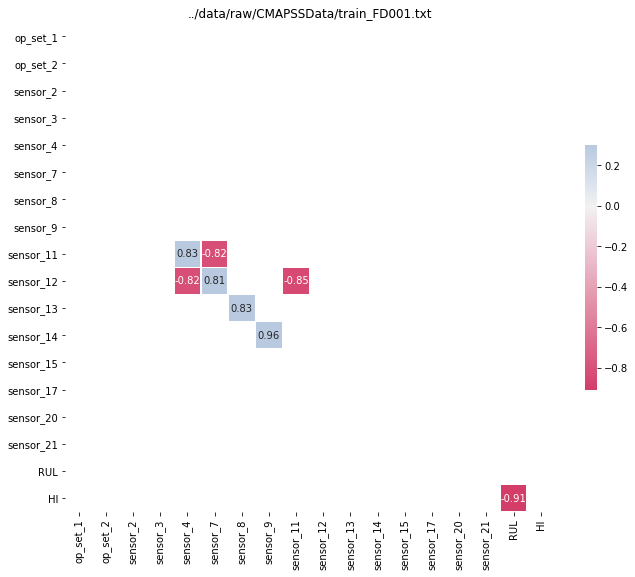

Most correlated pairwise : 


,corr_coef
sensor_9,0.963157
sensor_14,0.963157
sensor_4,0.830136
sensor_11,0.830136
sensor_8,0.826084
sensor_13,0.826084
sensor_7,0.812713
sensor_12,0.812713


In [79]:
# set treshold
tresh = 0.80
high_corr = corr[((corr >= tresh) | (corr <= -tresh)) & (corr !=1.000)]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set title as filename
plt.title(raw_files[0])

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(high_corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print('Most correlated pairwise : ')
hc = high_corr.max().to_frame('corr_coef')
hc[hc['corr_coef'] > tresh].sort_values(by='corr_coef', ascending=False)

sensor_9 = Physical Core Speed, Nc 

sensor_14 = Corrected Core Speed, NRc

We can then choose on of them since both carry quite the same information.

### Visualization

#### Maximum cycles

In [88]:
np.arange(1,101)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

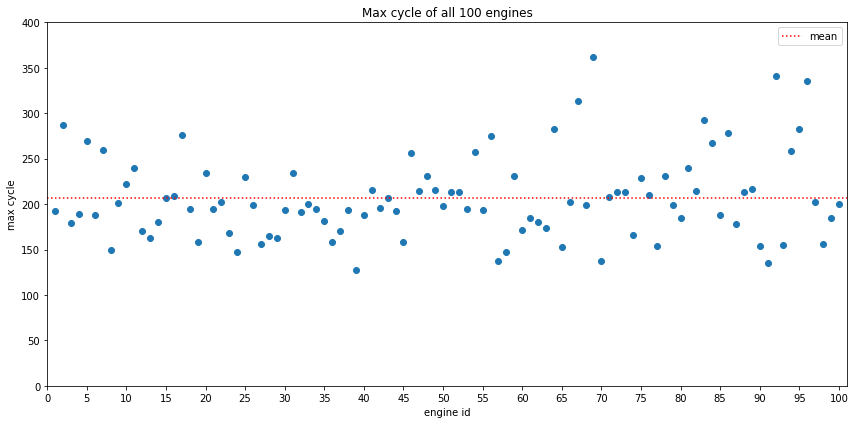

In [93]:
# maximum cycle dataframe
df_max = df[['engine_id', 'max_cycle']].groupby('engine_id').max().reset_index()

plt.figure(figsize=(12,6))
plt.title('Max cycle of all 100 engines')

plt.scatter(x=df_max['engine_id'], y=df_max['max_cycle'], cmap=df_max['engine_id'])
plt.axhline(y=df_max['max_cycle'].mean(), color='r', linestyle='dotted', label='mean')

plt.xlabel('engine id')
plt.ylabel('max cycle')
plt.xticks(np.arange(0, 101, step=5))
plt.xlim(0, 101)
plt.ylim(0, 400)
plt.xticks()
plt.legend()
# plt.grid()
plt.tight_layout()
plt.show()

#### Pairplot

In [ ]:
# sns.set(style="ticks")
# def hide_current_axis(*args, **kwds):
#     plt.gca().set_visible(False)
    
# data = df.drop(to_drop+constant_features+quasi_cons_features, axis=1)

# g = sns.PairGrid(data, diag_sharey=False)
# g.map_lower(sns.scatterplot, alpha=0.3, edgecolor='none')
# g.map_diag(sns.histplot, multiple="stack", element="step")
# g.map_upper(hide_current_axis)

#### Constant & Quasi-constant features

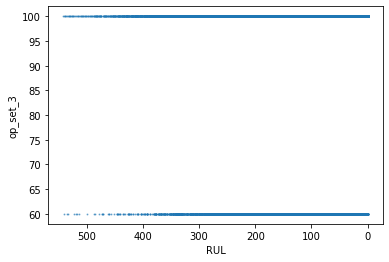

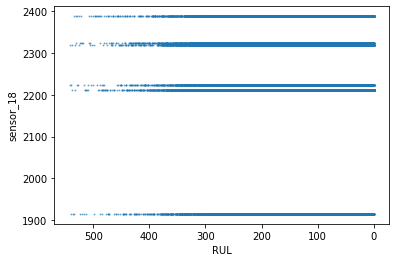

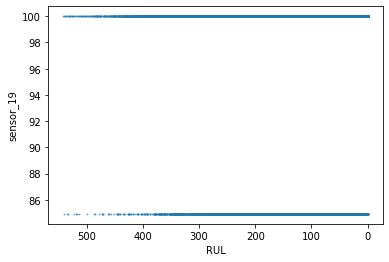

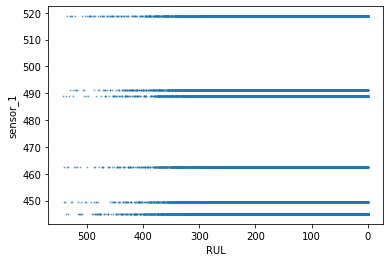

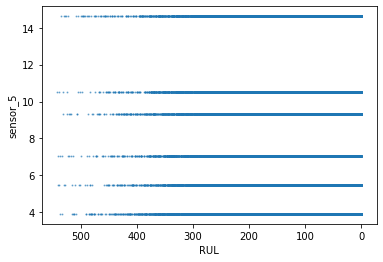

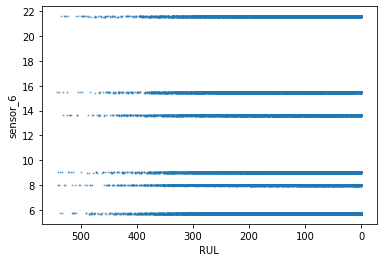

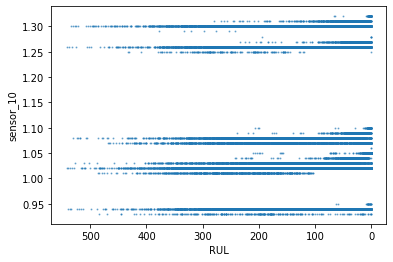

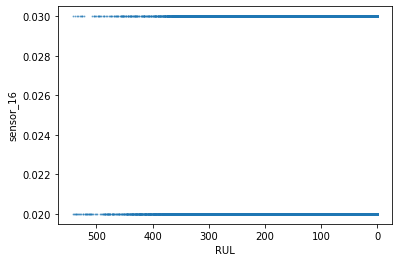

In [103]:
df_cst = df[constant_features + quasi_cons_features + ['RUL', 'engine_id']]

for col in df_cst.columns[:-2]:
    plt.figure()
    plt.scatter(x=df_cst['RUL'], y=df_cst[col], alpha=0.5, s=1)
    plt.ylabel(col)
    plt.xlabel('RUL')
    plt.gca().invert_xaxis()
    plt.show()    

#### Varying features

In [115]:
vary_features = [x for x in header if x not in constant_features] + ['RUL']

In [114]:
vary_features

['engine_id',
 'time_cycle',
 'op_set_1',
 'op_set_2',
 'sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_16',
 'sensor_17',
 'sensor_20',
 'sensor_21',
 'RUL']

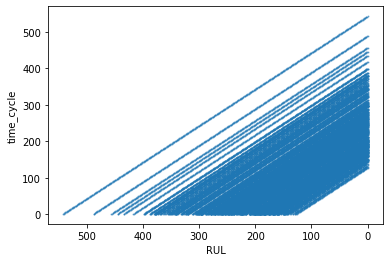

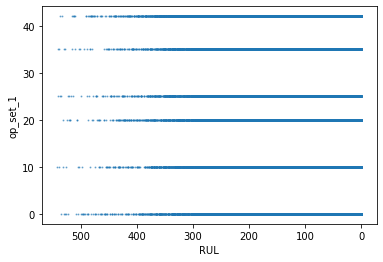

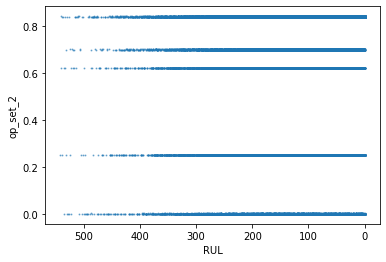

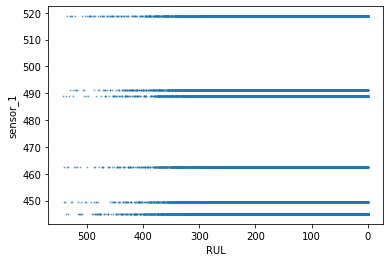

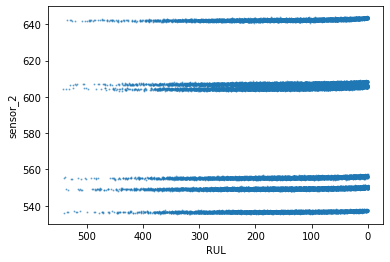

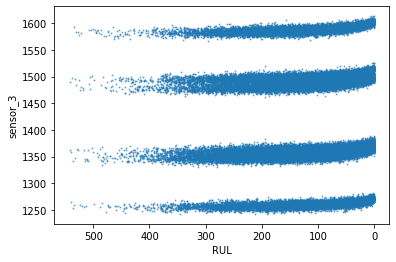

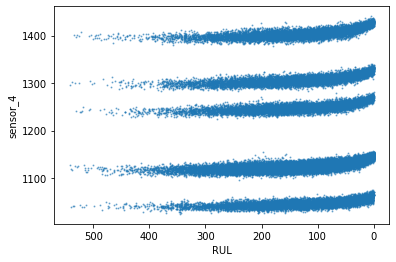

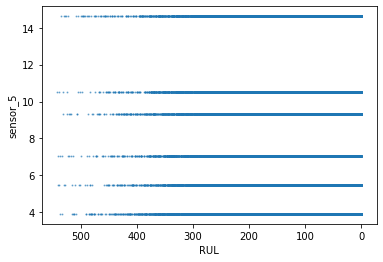

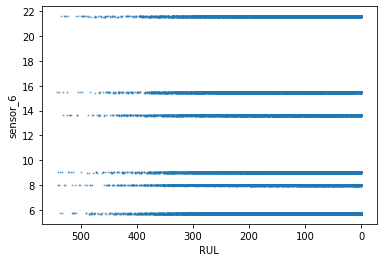

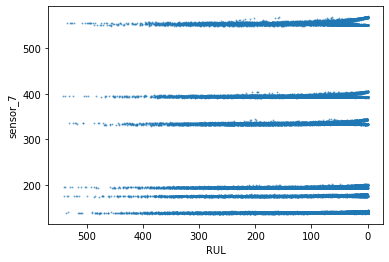

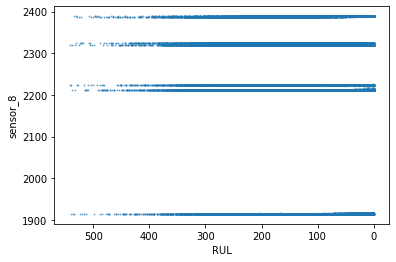

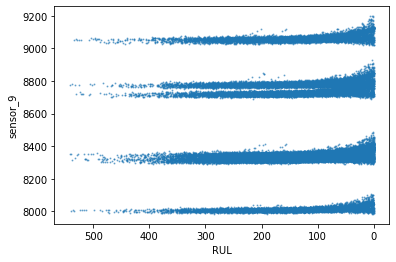

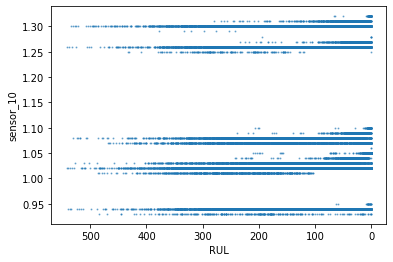

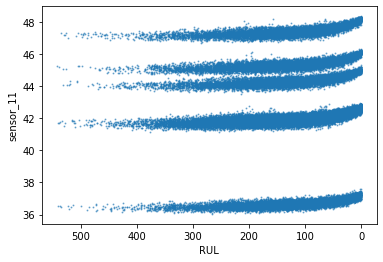

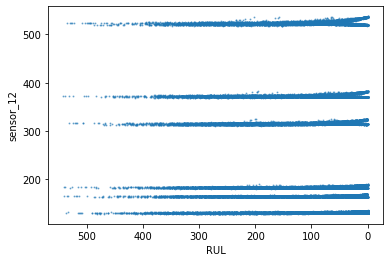

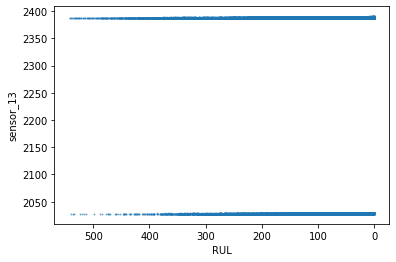

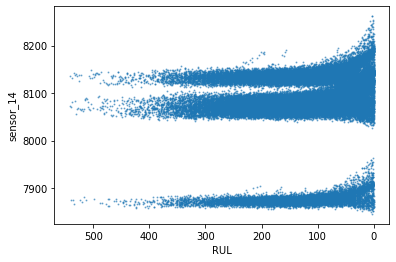

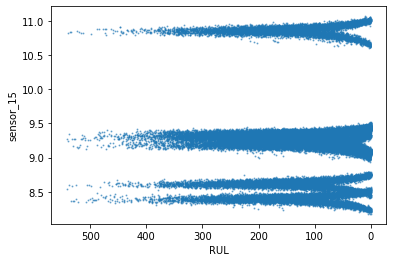

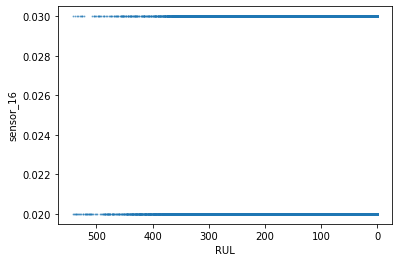

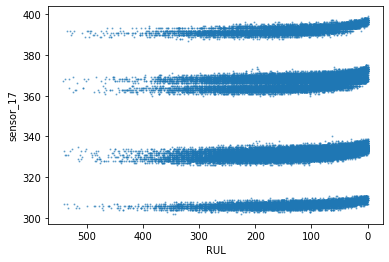

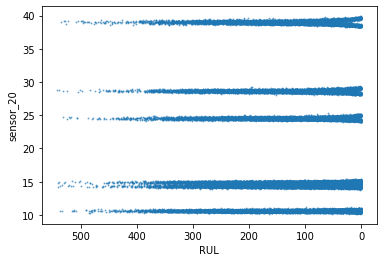

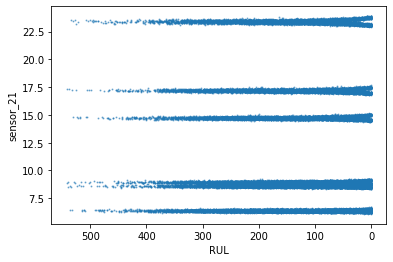

In [109]:
df_vary = df[vary_features]

for col in df_vary.columns[1:-1]:
    plt.figure()
    plt.scatter(x=df_vary['RUL'], y=df[col], alpha=0.5, s=1)
    plt.ylabel(col)
    plt.xlabel('RUL')
    plt.gca().invert_xaxis()
    plt.show()    

In [111]:
df_vary = df[vary_features]

for col in df_vary.columns[1:]:
    plt.figure()
    plt.scatter(x=df_vary['HI'], y=df[col], alpha=0.5, s=1)
    plt.ylabel(col)
    plt.xlabel('time_cycle')
    plt.gca().invert_xaxis()
    plt.show()    

KeyError: 'HI'

<Figure size 432x288 with 0 Axes>

### Saving to data/processed

In [94]:
raw_files

['../data/raw/CMAPSSData/train_FD001.txt',
 '../data/raw/CMAPSSData/train_FD002.txt',
 '../data/raw/CMAPSSData/train_FD003.txt',
 '../data/raw/CMAPSSData/train_FD004.txt']

In [99]:
path_to_processed_train = '../data/interim/'

# header
header = [ 'engine_id', 'time_cycle','op_set_1', 'op_set_2', 'op_set_3', 'sensor_1',
           'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
           'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
           'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
           'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21'
         ]


for file in raw_files:
    
    # upload data
    raw_data = pd.read_csv(file, sep=' ', header=None, )

    # drop empty columns (last 2 cols)
    raw_data.dropna(axis=1, inplace=True)

    # drop duplicate entry
    raw_data.drop_duplicates(inplace=True)

    # rename header
    raw_data.set_axis(labels=header, axis=1, inplace=True)

    # create new max_cycle df, each unit have their own max_cycle
    max_cycle = raw_data.groupby('engine_id', sort=False)['time_cycle'].max().to_frame('max_cycle').reset_index()

    # merge raw_data with max_cycle
    df = pd.merge(raw_data, max_cycle, how='inner', on='engine_id')

    # compute RUL
    df['RUL'] = df['max_cycle'] - df['time_cycle']
    
    # compute HI
    df['HI'] = df['time_cycle']/df['max_cycle']
    
    # save to csv file
#     df.to_csv(path_to_processed_train+file[-9:-4]+'_interim.csv', index=False)

In [100]:
!ls -lh ../data/interim/

total 29M
-rw-r--r-- 1 hhasbullah hhasbullah 3.8M Dec  3 15:44 FD001_interim.csv
-rw-r--r-- 1 hhasbullah hhasbullah 9.7M Dec  3 15:44 FD002_interim.csv
-rw-r--r-- 1 hhasbullah hhasbullah 4.6M Dec  3 15:44 FD003_interim.csv
-rw-r--r-- 1 hhasbullah hhasbullah  12M Dec  3 15:44 FD004_interim.csv
